In [29]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import math as m
import soundfile as sf

In [2]:
print(os.listdir(r'C:\Users\antoi\Desktop\Airbus\LibriSpeech\train-clean-100'))

['103', '1034', '1040', '1069', '1081', '1088', '1098', '1116', '118', '1183', '1235', '1246', '125', '1263', '1334', '1355', '1363', '1447', '1455', '150', '1502', '1553', '1578', '1594', '1624', '163', '1723', '1737', '1743', '1841', '1867', '1898', '19', '1926', '196', '1963', '1970', '198', '1992', '200', '2002', '2007', '201', '2092', '211', '2136', '2159', '2182', '2196', '226', '2289', '229', '233', '2384', '2391', '2416', '2436', '248', '250', '2514', '2518', '254', '26', '2691', '27', '2764', '2817', '2836', '2843', '289', '2893', '2910', '2911', '2952', '298', '2989', '302', '307', '311', '3112', '3168', '32', '3214', '322', '3235', '3240', '3242', '3259', '328', '332', '3374', '3436', '3440', '3486', '3526', '3607', '3664', '3699', '3723', '374', '3807', '3830', '3857', '3879', '39', '3947', '3982', '3983', '40', '4014', '4018', '403', '405', '4051', '4088', '412', '4137', '4160', '4195', '4214', '426', '4267', '4297', '4340', '4362', '4397', '4406', '441', '4441', '445', '4

In [82]:
def random_file():
    path = r'C:\Users\antoi\Desktop\Airbus\LibriSpeech\train-clean-100'
    dirr = os.listdir(path)
    dir1 = random.sample(dirr,1)[0]
    path = path + "\\" + dir1
    dir2 = os.listdir(path)
    dir2 = random.sample(dir2,1)[0]
    path = path + "\\" + dir2
    file = os.listdir(path)
    file = random.sample(file,1)[0]
    while file[-1] != 'c':
        file = os.listdir(path)
        file = random.sample(dir2,1)[0]
    path = path + "\\" + file
    return(path,file)

In [93]:
def random_plane():
    n = random.randint(0,24)
    return("record_"+str(n)+".wav")

In [88]:
path,file = random_file()
print(path,file[:-5])
plane = random_plane()
print(plane)

C:\Users\antoi\Desktop\Airbus\LibriSpeech\train-clean-100\7367\86737\7367-86737-0097.flac 7367-86737-0097
record_22


In [86]:
def get_time(lendata,samplerate):
    return(np.linspace(0,int(lendata/samplerate),lendata))

In [87]:
import soundfile as sf
datavoice, sampleratevoice = sf.read(path)
dataplane, samplerateplane = sf.read('record_0.wav')
print(len(dataplane),len(datavoice))

5898240 38640


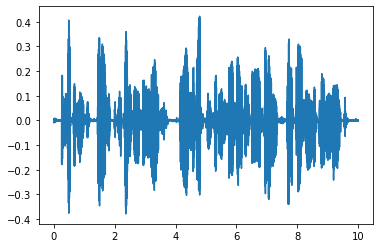

In [7]:
plt.plot(get_time(datavoice.shape[0],sampleratevoice),datavoice)

In [8]:
def filtre_voix_exp(data,place,sigma):
    imax = int(len(data)*place)
    exp = [m.exp(-1*((x-imax)**2)/(2*(sigma**2))) for x in range(len(data))]
    res = [exp[k] * data[k] for k in range(len(data))]
    return(res)

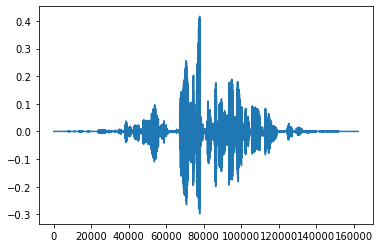

In [79]:
voix = filtre_voix_exp(datavoice,0.5,20000)
plt.plot(voix)

In [118]:
def filtre_voix_lin(data,sr,place,tps):
    imax_int = int(len(data)*place)
    ideb = imax_int - int(tps*sr/2)
    ifin = imax_int + int(tps*sr/2)
    lin = []
    for i in range(len(data)):
        if i<ideb:
            lin.append(0)
        if i>ideb and i<imax_int:
            lin.append((i-ideb)/(imax_int-ideb))
        if i>imax_int and i<ifin:
            lin.append((ifin-i)/(ifin-imax_int))
        else:
            lin.append(0)
    res = [lin[k] * datavoice[k] for k in range(len(data))]
    return(res)

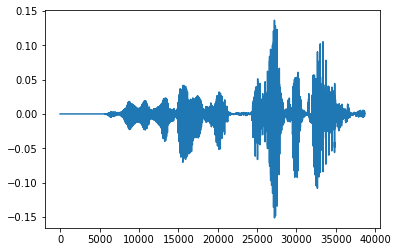

In [122]:
voix = filtre_voix_lin(datavoice,sampleratevoice,0.9,4)
plt.plot(voix)

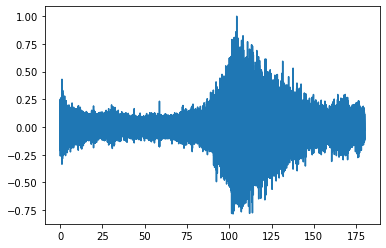

In [12]:
plt.plot(get_time(dataplane.shape[0],samplerateplane),dataplane)

In [96]:
#Les enregistrements d'avions et de voix n'ont pas le même sample rate. Afin de pouvoir les additionner facilement, on peut
#modifier le son avec le sample rate le plus petit, en considérant l'intensité constante entre les points 
#effectivement enregistrés

def same_sample_rate(d1,sr1,d2,sr2):
    data1 = []
    data2 = []
    if sr1>sr2:
        data1 = [k for k in d1]
        pas = int(sr1/sr2)
        #data2 = [d2[pas*k] for k in range(int(len(d2)/pas))]
        data2 = []
        for k in range(len(d2)):
            for p in range(pas):
                data2.append(d2[k])
    else:
        data2 = [k for k in d2]
        pas = int(sr2/sr1)
        #data1 = [d1[pas*k] for k in range(int(len(d1)/pas))]
        for k in range(len(d1)):
            for p in range(pas):
                data1.append(d1[k])
    return(np.array(data1),np.array(data2),max([sr1,sr2]))

In [97]:
da,dv,sr = same_sample_rate(dataplane,samplerateplane,datavoice,sampleratevoice)
print(len(da),len(dv))


5898240 77280


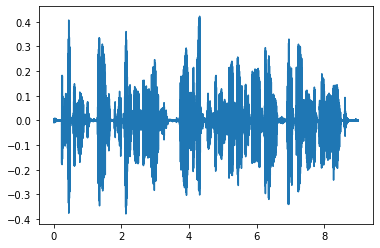

In [21]:
plt.plot(get_time(dv.shape[0],sr),dv)

In [155]:
test = []
i = 0
fin = len(dv)
for k in da:
    if i<fin:
        test.append(da[i] + dv[i])
        i+=1
    else:
        test.append(da[i])
        i=i+1


In [106]:
def add_sounds(d1,d2,place):
    res = []
    ld1 = len(d1)
    ld2 = len(d2)
    lmax = max([ld1,ld2])
    lmin = min([ld1,ld2])
    ideb = int(place*lmax)
    ifin = ideb + lmin 
    if ifin>=lmax:
        ifin = lmax-1
    if ld1==lmax:
        i1 = 0
        i2 = 0
        for k in d1:
            if i1>ideb and i1<ifin:
                res.append(d1[i1] + d2[i2])
                i1 += 1
                i2 += 1
            else:
                res.append(d1[i1])
                i1 += 1
    else:
        i1 = 0
        i2 = 0
        for k in d2:
            if i2>ideb and i2<ifin:
                res.append(d1[i1] + d2[i2])
                i1 += 1
                i2 += 1
            else:
                res.append(d2[i2])
                i2 += 1
    return(res)

In [80]:
add = add_sounds(da,dv,0.15)

5898240
324960
884736 1209696


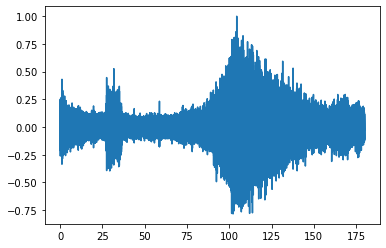

In [81]:
plt.plot(get_time(da.shape[0],sr),add)

In [28]:
sf.write('test.flac', add, sr)

In [129]:
def generate_database(nb):
    for i in range(nb):
        path,file = random_file()
        path_plane = random_plane()
        datavoice, sampleratevoice = sf.read(path)
        dataplane, samplerateplane = sf.read(path_plane)
        timevoice = len(datavoice)/sampleratevoice
        rand_filtre = random.randint(0,2)
        if rand_filtre==1:
            pos = random.randint(0,100)/100
            datavoice = filtre_voix_exp(datavoice,pos,random.randint(10000,20000))
        if rand_filtre == 2:
            pos = random.randint(0,100)/100
            temps = random.randint(2,int(timevoice/2))
            try:
                datavoice = filtre_voix_lin(datavoice,sampleratevoice,pos,temps)
            except:
                print(pos,temps,timevoice)
                continue
        plane,voice,sr = same_sample_rate(dataplane,samplerateplane,datavoice,sampleratevoice)
        place = random.randint(0,100)/100
        add = add_sounds(plane,voice,place)
        name = "db\\" + file[:-5] + "--" + path_plane[:-4] + ".wav"
        sf.write(name, add, sr)

In [130]:
generate_database(25)

0.22 4 12.045
0.65 5 14.39
0.22 4 10.875
0.93 2 14.325


KeyboardInterrupt: 